# Rf 1 0 3_Interprfuncs
Basic functionality: interpreted functions and p.d.f.s




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:39 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Generic interpreted p.d.f.
------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Construct generic pdf from interpreted expression
------------------------------------------------------

ROOT.To construct a proper p.d.f, the formula expression is explicitly normalized internally by dividing
it by a numeric integral of the expresssion over x in the range [-20,20]

In [3]:
alpha = ROOT.RooRealVar("alpha", "alpha", 5, 0.1, 10)
genpdf = ROOT.RooGenericPdf(
    "genpdf",
    "genpdf",
    "(1+0.1*abs(x)+sin(sqrt(abs(x*alpha+0.1))))",
    ROOT.RooArgList(
        x,
        alpha))

Sample, fit and plot generic pdf
---------------------------------------------------------------

Generate a toy dataset from the interpreted p.d.f

In [4]:
data = genpdf.generate(ROOT.RooArgSet(x), 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Fit the interpreted p.d.f to the generated data

In [5]:
genpdf.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha        5.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=35708.9 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
               

Make a plot of the data and the p.d.f overlaid

In [6]:
xframe = x.frame(ROOT.RooFit.Title("Interpreted expression pdf"))
data.plotOn(xframe)
genpdf.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_5559cd076a80") at 0x5559cd076a80>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Standard p.d.f. adjust with interpreted helper function
------------------------------------------------------------------------------------------------------------
Make a gauss(x,sqrt(mean2),sigma) from a standard ROOT.RooGaussian                                               #

Construct standard pdf with formula replacing parameter
------------------------------------------------------------------------------------------------------------

Construct parameter mean2 and sigma

In [7]:
mean2 = ROOT.RooRealVar("mean2", "mean^2", 10, 0, 200)
sigma = ROOT.RooRealVar("sigma", "sigma", 3, 0.1, 10)

Construct interpreted function mean = sqrt(mean^2)

In [8]:
mean = ROOT.RooFormulaVar(
    "mean", "mean", "sqrt(mean2)", ROOT.RooArgList(mean2))

Construct a gaussian g2(x,sqrt(mean2),sigma)

In [9]:
g2 = ROOT.RooGaussian("g2", "h2", x, mean, sigma)

Generate toy data
---------------------------------

Construct a separate gaussian g1(x,10,3) to generate a toy Gaussian
dataset with mean 10 and width 3

In [10]:
g1 = ROOT.RooGaussian("g1", "g1", x, ROOT.RooFit.RooConst(
    10), ROOT.RooFit.RooConst(3))
data2 = g1.generate(ROOT.RooArgSet(x), 1000)

Fit and plot tailored standard pdf
-------------------------------------------------------------------

Fit g2 to data from g1

In [11]:
r = g2.fitTo(data2, ROOT.RooFit.Save())  # ROOT.RooFitResult
r.Print()

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean2        1.00000e+01  5.00000e+00    0.00000e+00  2.00000e+02
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=5148.93 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Plot data on frame and overlay projection of g2

In [12]:
xframe2 = x.frame(ROOT.RooFit.Title("Tailored Gaussian pdf"))
data2.plotOn(xframe2)
g2.plotOn(xframe2)

<ROOT.RooPlot object ("frame_x_5559ccdcea20") at 0x5559ccdcea20>

Draw all frames on a canvas

In [13]:
c = ROOT.TCanvas("rf103_interprfuncs", "rf103_interprfuncs", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.4)
xframe2.Draw()

c.SaveAs("rf103_interprfuncs.png")

Info in <TCanvas::Print>: png file rf103_interprfuncs.png has been created


Draw all canvases 

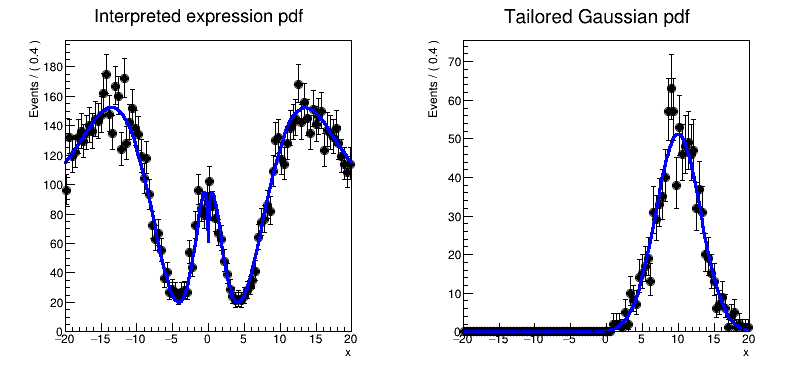

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()